In [1]:
import pandas as pd
import numpy as np
from sklearn.utils import shuffle
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import learning_curve,GridSearchCV

In [2]:
train = shuffle(pd.read_csv("train.csv"))
test = shuffle(pd.read_csv("test.csv"))

In [3]:
# Seperating Predictors and Outcome values from train and test sets
X_train = pd.DataFrame(train.drop(['Activity','subject'],axis=1))
Y_train_label = train.Activity.values.astype(object)
X_test = pd.DataFrame(test.drop(['Activity','subject'],axis=1))
Y_test_label = test.Activity.values.astype(object)

# Dimension of Train and Test set 
print("Dimension of Train set",X_train.shape)
print("Dimension of Test set",X_test.shape,"\n")

# Transforming non numerical labels into numerical labels
from sklearn import preprocessing
encoder = preprocessing.LabelEncoder()

# encoding train labels 
encoder.fit(Y_train_label)
Y_train = encoder.transform(Y_train_label)

# encoding test labels 
encoder.fit(Y_test_label)
Y_test = encoder.transform(Y_test_label)

#Total Number of Continous and Categorical features in the training set
num_cols = X_train._get_numeric_data().columns
print("Number of numeric features:",num_cols.size)
#list(set(X_train.columns) - set(num_cols))


names_of_predictors = list(X_train.columns.values)

# Scaling the Train and Test feature set 
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Dimension of Train set (7352, 561)
Dimension of Test set (2947, 561) 

Number of numeric features: 561


In [4]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 200)

X_train_scaled = pca.fit_transform(X_train_scaled, Y_train)
X_test_scaled = pca.transform(X_test_scaled)

In [5]:
rfc = RandomForestClassifier()

In [6]:
n_estimators_list = [10, 100, 1000]
max_depth_list = [int(x) for x in np.linspace(3, 12, num = 3)]
max_features_list = ['auto', 'log2']

params_grid = {'n_estimators': n_estimators_list, 'max_depth': max_depth_list, 'max_features' : max_features_list}

print(params_grid)

{'n_estimators': [10, 100, 1000], 'max_depth': [3, 7, 12], 'max_features': ['auto', 'log2']}


In [7]:
model = GridSearchCV(estimator = rfc, param_grid = params_grid, n_jobs = -1, cv = 4, scoring = 'accuracy', verbose = 4)
model.fit(X_train_scaled, Y_train)

Fitting 4 folds for each of 18 candidates, totalling 72 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:   48.3s
[Parallel(n_jobs=-1)]: Done  72 out of  72 | elapsed:  6.9min finished


GridSearchCV(cv=4, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

In [8]:
from sklearn.metrics import accuracy_score
pred_y = model.predict(X_test_scaled)
accuracy = accuracy_score(Y_test, pred_y)

accuracy_list = [round(accuracy, 4)]
print(accuracy_list)

[0.8887]


In [9]:
print (f"Best Parameters: {str(model.best_params_)}")
print (f"Accuracy Score : {accuracy_list[0] * 100}%") 

Best Parameters: {'max_depth': 12, 'max_features': 'log2', 'n_estimators': 1000}
Accuracy Score : 88.87%


In [10]:
n_estimators_list = [int(x) for x in np.linspace(100, 1000, num = 3)]
max_depth_list = [int(x) for x in np.linspace(3, 15, num = 3)]
max_features_list = ['auto', 'log2']

params_grid = {'n_estimators': n_estimators_list, 'max_depth': max_depth_list, 'max_features' : max_features_list}

print(params_grid)

{'n_estimators': [100, 550, 1000], 'max_depth': [3, 9, 15], 'max_features': ['auto', 'log2']}


In [11]:
model = GridSearchCV(estimator = rfc, param_grid = params_grid, n_jobs = -1, cv = 4, scoring = 'accuracy', verbose = 4)
model.fit(X_train_scaled, Y_train)

Fitting 4 folds for each of 18 candidates, totalling 72 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done  72 out of  72 | elapsed: 11.9min finished


GridSearchCV(cv=4, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

In [12]:
from sklearn.metrics import accuracy_score
pred_y = model.predict(X_test_scaled)
accuracy = accuracy_score(Y_test, pred_y)

accuracy_list.append(round(accuracy, 4))
print(accuracy_list)

[0.8887, 0.9002]


In [13]:
print (f"Best Parameters: {str(model.best_params_)}")
print (f"Accuracy Score : {accuracy_list[1] * 100}%") 

Best Parameters: {'max_depth': 15, 'max_features': 'log2', 'n_estimators': 1000}
Accuracy Score : 90.02%


In [14]:
n_estimators_list = [int(x) for x in np.linspace(100, 1000, num = 4)]
max_depth_list = [int(x) for x in np.linspace(3, 18, num = 5)]
max_features_list = ['auto', 'log2']

params_grid = {'n_estimators': n_estimators_list, 'max_depth': max_depth_list, 'max_features' : max_features_list}

print(params_grid)

{'n_estimators': [100, 400, 700, 1000], 'max_depth': [3, 6, 10, 14, 18], 'max_features': ['auto', 'log2']}


In [15]:
model = GridSearchCV(estimator = rfc, param_grid = params_grid, n_jobs = -1, cv = 4, scoring = 'accuracy', verbose = 4)
model.fit(X_train_scaled, Y_train)

Fitting 4 folds for each of 40 candidates, totalling 160 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed: 11.8min
[Parallel(n_jobs=-1)]: Done 160 out of 160 | elapsed: 29.4min finished


GridSearchCV(cv=4, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

In [16]:
from sklearn.metrics import accuracy_score
pred_y = model.predict(X_test_scaled)
accuracy = accuracy_score(Y_test, pred_y)

accuracy_list.append(round(accuracy, 4))
print(accuracy_list)

[0.8887, 0.9002, 0.8996]


In [17]:
print (f"Best Parameters: {str(model.best_params_)}")
print (f"Accuracy Score : {accuracy_list[2] * 100}%") 

Best Parameters: {'max_depth': 18, 'max_features': 'log2', 'n_estimators': 1000}
Accuracy Score : 89.96%


In [25]:
from sklearn.metrics import confusion_matrix, classification_report
Y_pred_label = list(encoder.inverse_transform(pred_y))

print (confusion_matrix(Y_test_label, Y_pred_label))
print (classification_report(Y_test_label, Y_pred_label))

[[536   0   1   0   0   0]
 [  3 369 118   0   0   1]
 [  0  24 508   0   0   0]
 [  0   0   0 473  22   1]
 [  0   0   0  57 328  35]
 [  0   0   0  23  11 437]]
                    precision    recall  f1-score   support

            LAYING       0.99      1.00      1.00       537
           SITTING       0.94      0.75      0.83       491
          STANDING       0.81      0.95      0.88       532
           WALKING       0.86      0.95      0.90       496
WALKING_DOWNSTAIRS       0.91      0.78      0.84       420
  WALKING_UPSTAIRS       0.92      0.93      0.92       471

          accuracy                           0.90      2947
         macro avg       0.90      0.89      0.90      2947
      weighted avg       0.90      0.90      0.90      2947



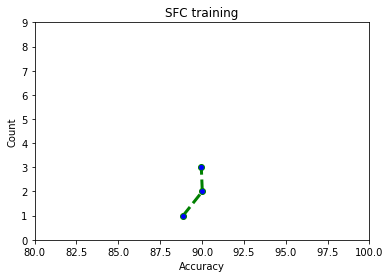

In [21]:
import matplotlib.pyplot as plt

percentage_list = [p * 100 for p in accuracy_list]

# setting the corresponding y - coordinates 
y = [i + 1 for i in range(len(accuracy_list))]
  
# potting the points 
plt.plot(percentage_list, y, color = 'green', linestyle = 'dashed', linewidth = 3, 
         marker = 'o', markerfacecolor = 'blue', markersize = 6)

plt.ylim(0, 9) 
plt.xlim(80, 100) 

# naming the x axis 
plt.xlabel('Accuracy') 
# naming the y axis 
plt.ylabel('Count')

plt.title('SFC training')
  
# function to show the plot 
plt.show() 